<a href="https://colab.research.google.com/github/K-Kamonrat/DPDM/blob/master/Project_AssRules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from pandas.api.types import CategoricalDtype

In [4]:
from matplotlib import pyplot as plt

In [5]:
from google.colab import drive

In [75]:
! pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=0365f502a4777ff0ea94d69b37e4008f21ca5dd705d8173e8bbcd606873daf38
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [77]:
from apyori import apriori

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


#Import Data

In [7]:
import os
path =  '/content/drive/My Drive/DPDM_Project'

In [11]:
water = os.path.join(path, 'water.csv')
water_df = pd.read_csv(water)
pee = os.path.join(path,'pee.xlsx')
pee_1 = pd.read_excel(pee)
prang = os.path.join(path,'prang.xlsx')
prang_1 = pd.read_excel(prang)

#ข้อมูลน้ำนอกเขตชลประทาน

In [56]:
water_df

,ID,ตำบล,อำเภอ,จังหวัด,พิกัด (X) E,พิกัด (Y) N,ปีงบประมาณ
0,1,เกาะกลาง,เกาะลันตา,กระบี่,505670,858758,2559
1,2,เกาะกลาง,เกาะลันตา,กระบี่,506333,861539,2559
2,3,เกาะลันตาน้อย,เกาะลันตา,กระบี่,513081,840391,2559
3,4,เกาะลันตาน้อย,เกาะลันตา,กระบี่,512434,842817,2559
4,5,เกาะลันตาน้อย,เกาะลันตา,กระบี่,512451,842706,2559
...,...,...,...,...,...,...,...
14426,14427,เหล่าเสือโก้ก,เหล่าเสือโก้ก,อุบลราชธานี,1134830,1709650,2559
14427,14428,เหล่าเสือโก้ก,เหล่าเสือโก้ก,อุบลราชธานี,1135160,1709614,2559
14428,14429,เหล่าเสือโก้ก,เหล่าเสือโก้ก,อุบลราชธานี,1134023,1708384,2559
14429,14430,เหล่าเสือโก้ก,เหล่าเสือโก้ก,อุบลราชธานี,1133663,1710891,2559


In [57]:
#รวมแหล่งน้ำทั้งหมดของแต่ละจังหวัด
water_number_province =  water_df.groupby('จังหวัด').count()
water_number_province

,ID,ตำบล,อำเภอ,พิกัด (X) E,พิกัด (Y) N,ปีงบประมาณ
จังหวัด,,,,,,
กระบี่,28,28,28,28,28,28
กาญจนบุรี,48,48,48,48,48,48
กาฬสินธุ์,864,864,864,864,864,864
กำแพงเพชร,298,298,298,298,298,298
ขอนแก่น,735,735,735,735,735,735
จันทบุรี,69,69,69,69,69,69
ฉะเชิงเทรา,97,97,97,97,97,97
ชลบุรี,47,47,47,47,47,47
ชัยนาท,39,39,39,39,39,39


{'boxes': [<matplotlib.lines.Line2D at 0x7f00c5533588>],
 'caps': [<matplotlib.lines.Line2D at 0x7f00c5533f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f00c54c8a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f00c54c86d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f00c5533898>,
  <matplotlib.lines.Line2D at 0x7f00c5533c18>]}

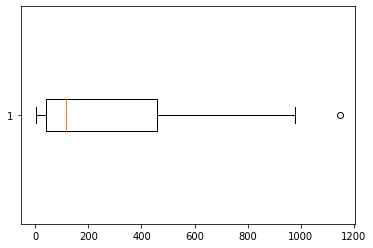

In [14]:
#Boxplot
ret_water = plt.boxplot(water_number_province['ID'],vert=False)
ret_water

In [15]:
ret_water['whiskers'][0].get_xdata()

array([39.5,  2. ])

In [18]:
water_number_province.median()

ID             115.0
ตำบล           115.0
อำเภอ          115.0
พิกัด (X) E    115.0
พิกัด (Y) N    115.0
ปีงบประมาณ     115.0
dtype: float64

In [16]:
ret_water['whiskers'][1].get_xdata()

array([457.5, 979. ])

In [58]:
water_number_province.max()

ID             1148
ตำบล           1148
อำเภอ          1148
พิกัด (X) E    1148
พิกัด (Y) N    1148
ปีงบประมาณ     1148
dtype: int64

#Water Group
* A = 2 -39
* B = 40 - 115
* C = 116 - 457
* D = 458 -1148

In [59]:
#select only column "จังหวัด" and "ID"
water1 = water_number_province.iloc[:,0:1]
water1

,ID
จังหวัด,
กระบี่,28
กาญจนบุรี,48
กาฬสินธุ์,864
กำแพงเพชร,298
ขอนแก่น,735
จันทบุรี,69
ฉะเชิงเทรา,97
ชลบุรี,47
ชัยนาท,39


In [60]:
#แบ่งกลุ่ม
w_bucket = ['water1','water2','water3','water4']
water1['group_water'] = pd.cut(water1.ID,
                            bins=[2,40,116,458,1149],
                            labels=w_bucket,
                            right=False).astype(str).astype(CategoricalDtype(w_bucket,ordered=True))
water1#.sort_values(by='group_water')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,group_water
จังหวัด,,
กระบี่,28,water1
กาญจนบุรี,48,water2
กาฬสินธุ์,864,water4
กำแพงเพชร,298,water3
ขอนแก่น,735,water4
จันทบุรี,69,water2
ฉะเชิงเทรา,97,water2
ชลบุรี,47,water2
ชัยนาท,39,water1


#ข้อมูลข้าวนาปี

In [23]:
pee_1

,สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรข้าวนาปี,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ผลผลิตข้าวนาปีแยกตามจังหวัด ปี 2562,NaN,NaN,NaN,NaN
1,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
2,อุบลราชธานี,1406996,0.0545,3879360,362.69
3,นครสวรรค์,1359065,0.0527,2273197,597.87
4,นครราชสีมา,1101661,0.0427,3035540,362.92
...,...,...,...,...,...
74,ชุมพร,1499,0.0001,3374,444.28
75,สมุทรสงคราม,1493,0.0001,2094,712.99
76,พังงา,964,0,2976,323.92
77,ระนอง,259,0,750,345.33


In [25]:
#ตัด 2 แถวแรกออก
pee_2 = pee_1.iloc[2:,:]
pee_2

,สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรข้าวนาปี,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,อุบลราชธานี,1406996,0.0545,3879360,362.69
3,นครสวรรค์,1359065,0.0527,2273197,597.87
4,นครราชสีมา,1101661,0.0427,3035540,362.92
5,สุรินทร์,1070221,0.0415,2862831,373.83
6,ร้อยเอ็ด,1058807,0.041,2882337,367.34
...,...,...,...,...,...
74,ชุมพร,1499,0.0001,3374,444.28
75,สมุทรสงคราม,1493,0.0001,2094,712.99
76,พังงา,964,0,2976,323.92
77,ระนอง,259,0,750,345.33


In [26]:
#เปลี่ยนชื่อคอลัมน์
pee_2.rename(columns={'สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรข้าวนาปี':'จังหวัด','Unnamed: 1':'ผลผลิต(ตัน)','Unnamed: 2':'สัดส่วน','Unnamed: 3':'เนื้อที่เก็บเกี่ยว','Unnamed: 4':'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก)'}, inplace=True)
pee_2

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว,ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก)
2,อุบลราชธานี,1406996,0.0545,3879360,362.69
3,นครสวรรค์,1359065,0.0527,2273197,597.87
4,นครราชสีมา,1101661,0.0427,3035540,362.92
5,สุรินทร์,1070221,0.0415,2862831,373.83
6,ร้อยเอ็ด,1058807,0.041,2882337,367.34
...,...,...,...,...,...
74,ชุมพร,1499,0.0001,3374,444.28
75,สมุทรสงคราม,1493,0.0001,2094,712.99
76,พังงา,964,0,2976,323.92
77,ระนอง,259,0,750,345.33


{'boxes': [<matplotlib.lines.Line2D at 0x7f00c4ec6400>],
 'caps': [<matplotlib.lines.Line2D at 0x7f00c4ec6e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f00c4ed18d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f00c4ed1550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f00c4ec6710>,
  <matplotlib.lines.Line2D at 0x7f00c4ec6a90>]}

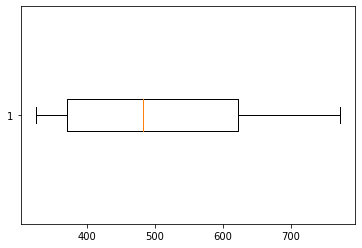

In [27]:
#Boxplot
ret_pee_2 = plt.boxplot(pee_2['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก)'],vert=False)
ret_pee_2

In [28]:
ret_pee_2['whiskers'][0].get_xdata()

array([370.48, 323.92])

In [30]:
pee_2['ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก)'].median()

482.46

In [29]:
ret_pee_2['whiskers'][1].get_xdata()

array([622.42, 773.27])

#กลุ่มข้าวนาปี
* pee1 = 323.92 - 370.48
* pee2 = 370.48 - 482.46
* pee3 = 482.46 - 622.42
* pee4 = 622.42 - 773.27

In [31]:
#ตัดคอมลัมน์ที่ไม่ใช้
pee_3 = pee_2
pee_3.drop(['สัดส่วน','เนื้อที่เก็บเกี่ยว'],axis=1,inplace=True)
pee_4=pee_3
pee_4.rename(columns={'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก)':'pee_product'}, inplace=True)
pee_4

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,จังหวัด,ผลผลิต(ตัน),pee_product
2,อุบลราชธานี,1406996,362.69
3,นครสวรรค์,1359065,597.87
4,นครราชสีมา,1101661,362.92
5,สุรินทร์,1070221,373.83
6,ร้อยเอ็ด,1058807,367.34
...,...,...,...
74,ชุมพร,1499,444.28
75,สมุทรสงคราม,1493,712.99
76,พังงา,964,323.92
77,ระนอง,259,345.33


In [32]:
#แบ่งกลุ่มข้าวนาปี
#pee_product is ผลผลิต(กก)ต่อเนื้อที่เก็บเกี่ยว
pee_bucket = ['pee1','pee2','pee3','pee4']
pee_4['group_pee'] = pd.cut(pee_4.pee_product,
                            bins=[323.92,370.48,482.46,622.42,773.28],
                            labels=pee_bucket,
                            right=False).astype(str).astype(CategoricalDtype(pee_bucket,ordered=True))
pee_4#.sort_values(by='group_pee')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,จังหวัด,ผลผลิต(ตัน),pee_product,group_pee
2,อุบลราชธานี,1406996,362.69,pee1
3,นครสวรรค์,1359065,597.87,pee3
4,นครราชสีมา,1101661,362.92,pee1
5,สุรินทร์,1070221,373.83,pee2
6,ร้อยเอ็ด,1058807,367.34,pee1
...,...,...,...,...
74,ชุมพร,1499,444.28,pee2
75,สมุทรสงคราม,1493,712.99,pee4
76,พังงา,964,323.92,pee1
77,ระนอง,259,345.33,pee1


#ข้อมูลข้าวนาปรัง


In [46]:
prang_1

,สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรข้าวนาปรัง,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ผลผลิตข้าวนาปรังแยกตามจังหวัด ปี 2562,NaN,NaN,NaN,NaN
1,จังหวัด,ผลผลิต(ตัน),สัดส่วน,เนื้อที่เก็บเกี่ยว(ไร่),ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)
2,สุพรรณบุรี,599010,0.0835,830766,721.03
3,นครสวรรค์,525622,0.0733,782660,671.58
4,อยุธยา,504311,0.0703,716664,703.69
...,...,...,...,...,...
67,มุกดาหาร,202,0,423,477.54
68,เลย,167,0,387,431.52
69,ยะลา,81,0,180,450
70,ตรัง,70,0,147,476.19


In [47]:
#ตัด 2 แถวแรกออก
prang_2 = prang_1.iloc[2:,:]
prang_2

,สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรข้าวนาปรัง,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,สุพรรณบุรี,599010,0.0835,830766,721.03
3,นครสวรรค์,525622,0.0733,782660,671.58
4,อยุธยา,504311,0.0703,716664,703.69
5,พิษณุโลก,497596,0.0694,763706,651.55
6,พิจิตร,444055,0.0619,707051,628.04
...,...,...,...,...,...
67,มุกดาหาร,202,0,423,477.54
68,เลย,167,0,387,431.52
69,ยะลา,81,0,180,450
70,ตรัง,70,0,147,476.19


In [48]:
#เปลี่ยนชื่อ columns
prang_2.rename(columns={'สำนักงานเศรษฐกิจการเกษตร | สินค้าเกษตรข้าวนาปรัง':'จังหวัด','Unnamed: 1':'ผลผลิต_ปรัง(ตัน)','Unnamed: 2':'สัดส่วน_ปรัง','Unnamed: 3':'เนื้อที่_ปรัง','Unnamed: 4':'ผลผลิตต่อเนื้อที่_ปรัง(กก)'}, inplace=True)
prang_2

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,จังหวัด,ผลผลิต_ปรัง(ตัน),สัดส่วน_ปรัง,เนื้อที่_ปรัง,ผลผลิตต่อเนื้อที่_ปรัง(กก)
2,สุพรรณบุรี,599010,0.0835,830766,721.03
3,นครสวรรค์,525622,0.0733,782660,671.58
4,อยุธยา,504311,0.0703,716664,703.69
5,พิษณุโลก,497596,0.0694,763706,651.55
6,พิจิตร,444055,0.0619,707051,628.04
...,...,...,...,...,...
67,มุกดาหาร,202,0,423,477.54
68,เลย,167,0,387,431.52
69,ยะลา,81,0,180,450
70,ตรัง,70,0,147,476.19


{'boxes': [<matplotlib.lines.Line2D at 0x7f00c4e21780>],
 'caps': [<matplotlib.lines.Line2D at 0x7f00c4dae1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f00c4daec50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f00c4dae8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f00c4e21a90>,
  <matplotlib.lines.Line2D at 0x7f00c4e21e10>]}

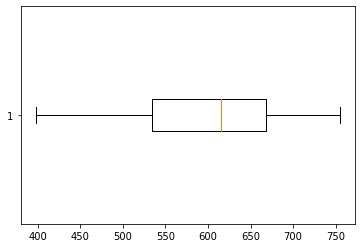

In [49]:
#Boxplot
ret_prang_2 = plt.boxplot(prang_2['ผลผลิตต่อเนื้อที่_ปรัง(กก)'],vert=False)
ret_prang_2

In [50]:
ret_prang_2['whiskers'][0].get_xdata()

array([534.7375, 397.83  ])

In [51]:
prang_2['ผลผลิตต่อเนื้อที่_ปรัง(กก)'].median()

615.4100000000001

In [52]:
ret_prang_2['whiskers'][1].get_xdata()

array([668.585, 755.25 ])

#กลุ่มข้าวนาปรัง
* prang1 = 397.83 - 534.7375
* prang2 = 534.7375 - 615.410
* prang3 = 615.410 - 668.585
* prang4 = 668.585 - 755.25

In [53]:
#ตัดคอมลัมน์ที่ไม่ใช้
prang_3 = prang_2
prang_3.drop(['สัดส่วน_ปรัง','เนื้อที่_ปรัง'],axis=1,inplace=True)
prang_3.rename(columns={'ผลผลิตต่อเนื้อที่_ปรัง(กก)':'prang_product'}, inplace=True)
prang_3

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,จังหวัด,ผลผลิต_ปรัง(ตัน),prang_product
2,สุพรรณบุรี,599010,721.03
3,นครสวรรค์,525622,671.58
4,อยุธยา,504311,703.69
5,พิษณุโลก,497596,651.55
6,พิจิตร,444055,628.04
...,...,...,...
67,มุกดาหาร,202,477.54
68,เลย,167,431.52
69,ยะลา,81,450
70,ตรัง,70,476.19


In [54]:
prang_4=prang_3

In [55]:
#จัดกลุ่มข้าวนาปรัง
#prang_product is ผลผลิต(กก)ต่อเนื้อที่เก็บเกี่ยว
prang_bucket = ['prang1','prang2','prang3','prang4']
prang_4['group_prang'] = pd.cut(prang_4.prang_product,
                            bins=[397.83,534.7375,615.410,668.585,755.26],
                            labels=prang_bucket,
                            right=False).astype(str).astype(CategoricalDtype(prang_bucket,ordered=True))
prang_4#.sort_values(by='group_prang')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,จังหวัด,ผลผลิต_ปรัง(ตัน),prang_product,group_prang
2,สุพรรณบุรี,599010,721.03,prang4
3,นครสวรรค์,525622,671.58,prang4
4,อยุธยา,504311,703.69,prang4
5,พิษณุโลก,497596,651.55,prang3
6,พิจิตร,444055,628.04,prang3
...,...,...,...,...
67,มุกดาหาร,202,477.54,prang1
68,เลย,167,431.52,prang1
69,ยะลา,81,450,prang1
70,ตรัง,70,476.19,prang1


#รวมตาราง

In [61]:
#รวมข้าว
rice = pee_4.merge(prang_4,how='left',left_on='จังหวัด',right_on='จังหวัด')
rice

,จังหวัด,ผลผลิต(ตัน),pee_product,group_pee,ผลผลิต_ปรัง(ตัน),prang_product,group_prang
0,อุบลราชธานี,1406996,362.69,pee1,73604,478.2,prang1
1,นครสวรรค์,1359065,597.87,pee3,525622,671.58,prang4
2,นครราชสีมา,1101661,362.92,pee1,81374,623.96,prang3
3,สุรินทร์,1070221,373.83,pee2,22995,461.14,prang1
4,ร้อยเอ็ด,1058807,367.34,pee1,101636,587.71,prang2
...,...,...,...,...,...,...,...
72,ชุมพร,1499,444.28,pee2,500,504.03,prang1
73,สมุทรสงคราม,1493,712.99,pee4,1079,687.7,prang4
74,พังงา,964,323.92,pee1,NaN,NaN,NaN
75,ระนอง,259,345.33,pee1,NaN,NaN,NaN


In [62]:
#รวมข้าวกับน้ำ
df = rice.merge(water1,how='left',left_on='จังหวัด',right_on='จังหวัด')
df

,จังหวัด,ผลผลิต(ตัน),pee_product,group_pee,ผลผลิต_ปรัง(ตัน),prang_product,group_prang,ID,group_water
0,อุบลราชธานี,1406996,362.69,pee1,73604,478.2,prang1,651.0,water4
1,นครสวรรค์,1359065,597.87,pee3,525622,671.58,prang4,249.0,water3
2,นครราชสีมา,1101661,362.92,pee1,81374,623.96,prang3,674.0,water4
3,สุรินทร์,1070221,373.83,pee2,22995,461.14,prang1,NaN,NaN
4,ร้อยเอ็ด,1058807,367.34,pee1,101636,587.71,prang2,NaN,NaN
...,...,...,...,...,...,...,...,...,...
72,ชุมพร,1499,444.28,pee2,500,504.03,prang1,20.0,water1
73,สมุทรสงคราม,1493,712.99,pee4,1079,687.7,prang4,NaN,NaN
74,พังงา,964,323.92,pee1,NaN,NaN,NaN,20.0,water1
75,ระนอง,259,345.33,pee1,NaN,NaN,NaN,NaN,NaN


In [64]:
#Check missing walue
df.isnull().any()

จังหวัด             False
ผลผลิต(ตัน)         False
pee_product         False
group_pee           False
ผลผลิต_ปรัง(ตัน)     True
prang_product        True
group_prang          True
ID                   True
group_water          True
dtype: bool

In [65]:
#Missing ของข้าวนาปรัง หมายถึงจังหวัดนั้นไม่ผลิตข้าวนาปรัง เติมด้วย 0
df[['ผลผลิต_ปรัง(ตัน)','prang_product']] = df[['ผลผลิต_ปรัง(ตัน)','prang_product']].fillna(0)

In [66]:
#Missing ของน้ำ หมายถึงจังหวัดนั้นไม่แหล่งน้ำนอกเขตชลประทานที่กรมชลประทานขุดให้ เติมด้วย 0
df[['ID']] = df[['ID']].fillna(0)

In [68]:
#Check missing walue
df.isnull().any()

จังหวัด             False
ผลผลิต(ตัน)         False
pee_product         False
group_pee           False
ผลผลิต_ปรัง(ตัน)    False
prang_product       False
group_prang          True
ID                  False
group_water          True
dtype: bool

In [69]:
df['group_prang'] = df['group_prang'].cat.add_categories('e')
df['group_prang'].fillna('e', inplace =True)

In [72]:
df['group_water'] = df['group_water'].cat.add_categories('n')
df['group_water'].fillna('n', inplace =True)

In [73]:
#Check missing walue
df.isnull().any()

จังหวัด             False
ผลผลิต(ตัน)         False
pee_product         False
group_pee           False
ผลผลิต_ปรัง(ตัน)    False
prang_product       False
group_prang         False
ID                  False
group_water         False
dtype: bool

In [74]:
df

,จังหวัด,ผลผลิต(ตัน),pee_product,group_pee,ผลผลิต_ปรัง(ตัน),prang_product,group_prang,ID,group_water
0,อุบลราชธานี,1406996,362.69,pee1,73604,478.20,prang1,651.0,water4
1,นครสวรรค์,1359065,597.87,pee3,525622,671.58,prang4,249.0,water3
2,นครราชสีมา,1101661,362.92,pee1,81374,623.96,prang3,674.0,water4
3,สุรินทร์,1070221,373.83,pee2,22995,461.14,prang1,0.0,n
4,ร้อยเอ็ด,1058807,367.34,pee1,101636,587.71,prang2,0.0,n
...,...,...,...,...,...,...,...,...,...
72,ชุมพร,1499,444.28,pee2,500,504.03,prang1,20.0,water1
73,สมุทรสงคราม,1493,712.99,pee4,1079,687.70,prang4,0.0,n
74,พังงา,964,323.92,pee1,0,0.00,e,20.0,water1
75,ระนอง,259,345.33,pee1,0,0.00,e,0.0,n


In [79]:
df1 = df[['จังหวัด','group_pee','group_prang','group_water']]
df1

,จังหวัด,group_pee,group_prang,group_water
0,อุบลราชธานี,pee1,prang1,water4
1,นครสวรรค์,pee3,prang4,water3
2,นครราชสีมา,pee1,prang3,water4
3,สุรินทร์,pee2,prang1,n
4,ร้อยเอ็ด,pee1,prang2,n
...,...,...,...,...
72,ชุมพร,pee2,prang1,water1
73,สมุทรสงคราม,pee4,prang4,n
74,พังงา,pee1,e,water1
75,ระนอง,pee1,e,n


##Association

In [81]:
#Convert data to list
transacs = []
for i in range(0,len(df1)):
  transacs.append([str(df1.values[i,j]) for j in range(1,4)])
transacs

[['pee1', 'prang1', 'water4'],
 ['pee3', 'prang4', 'water3'],
 ['pee1', 'prang3', 'water4'],
 ['pee2', 'prang1', 'n'],
 ['pee1', 'prang2', 'n'],
 ['pee1', 'prang1', 'water3'],
 ['pee1', 'prang1', 'water4'],
 ['pee3', 'prang3', 'water3'],
 ['pee4', 'prang4', 'water2'],
 ['pee3', 'prang3', 'water4'],
 ['pee2', 'prang2', 'water4'],
 ['pee3', 'prang3', 'water3'],
 ['pee1', 'prang2', 'water2'],
 ['pee3', 'prang4', 'water3'],
 ['pee1', 'prang1', 'water4'],
 ['pee2', 'prang1', 'water4'],
 ['pee3', 'prang2', 'water3'],
 ['pee3', 'prang2', 'water3'],
 ['pee4', 'prang3', 'water1'],
 ['pee2', 'prang2', 'water4'],
 ['pee1', 'prang3', 'water4'],
 ['pee4', 'prang4', 'n'],
 ['pee1', 'prang1', 'water1'],
 ['pee1', 'prang2', 'water4'],
 ['pee3', 'prang3', 'water2'],
 ['pee4', 'prang4', 'water2'],
 ['pee3', 'prang3', 'n'],
 ['pee1', 'prang1', 'water4'],
 ['pee3', 'prang3', 'water3'],
 ['pee4', 'prang3', 'water2'],
 ['pee4', 'prang4', 'water3'],
 ['pee4', 'prang4', 'water2'],
 ['pee4', 'prang4', 'n'],
 [

In [82]:
association = list(apriori(transacs,min_support = 0.06, min_confidence = 0.7))
association

[RelationRecord(items=frozenset({'pee4', 'prang4'}), support=0.19480519480519481, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pee4'}), items_add=frozenset({'prang4'}), confidence=0.7500000000000001, lift=3.208333333333334), OrderedStatistic(items_base=frozenset({'prang4'}), items_add=frozenset({'pee4'}), confidence=0.8333333333333334, lift=3.208333333333334)]),
 RelationRecord(items=frozenset({'pee4', 'n', 'prang4'}), support=0.1038961038961039, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pee4', 'n'}), items_add=frozenset({'prang4'}), confidence=0.8000000000000002, lift=3.422222222222223), OrderedStatistic(items_base=frozenset({'n', 'prang4'}), items_add=frozenset({'pee4'}), confidence=1.0, lift=3.8500000000000005)]),
 RelationRecord(items=frozenset({'pee1', 'water4', 'prang1'}), support=0.07792207792207792, ordered_statistics=[OrderedStatistic(items_base=frozenset({'prang1', 'water4'}), items_add=frozenset({'pee1'}), confidence=0.7499999999999999, lift=

In [83]:
association1 = list(apriori(transacs,min_support = 0.06, min_confidence = 0.5))
association1

[RelationRecord(items=frozenset({'pee4', 'n'}), support=0.12987012987012986, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pee4'}), items_add=frozenset({'n'}), confidence=0.5, lift=1.75)]),
 RelationRecord(items=frozenset({'pee1', 'prang1'}), support=0.11688311688311688, ordered_statistics=[OrderedStatistic(items_base=frozenset({'prang1'}), items_add=frozenset({'pee1'}), confidence=0.5, lift=2.026315789473684)]),
 RelationRecord(items=frozenset({'pee1', 'water4'}), support=0.11688311688311688, ordered_statistics=[OrderedStatistic(items_base=frozenset({'water4'}), items_add=frozenset({'pee1'}), confidence=0.6428571428571428, lift=2.6052631578947367)]),
 RelationRecord(items=frozenset({'prang3', 'pee3'}), support=0.11688311688311688, ordered_statistics=[OrderedStatistic(items_base=frozenset({'prang3'}), items_add=frozenset({'pee3'}), confidence=0.5294117647058824, lift=2.1455108359133126)]),
 RelationRecord(items=frozenset({'water3', 'pee3'}), support=0.09090909090909091, o